# Data Science Task - Document to Text

### __Requirements:__
1. Convert your own resume into a PDF file
1. Use any open-source Python libraries or Deep Learning tools to read and get the text info from the PDF file  
1. Count the frequency of words, and present a chart (not a table) showing the top 10 most frequent words (what are the words and the corresponding frequency for each word)  
1. Present a word cloud  
1. Describe what you would do differently if you are processing a high volume of standardized format document such as W-2s in pdf, and you only need to extract a few fields (such as Gross Income and Fed Tax) from each of the documents.   


### Install Python dependencies



In [ ]:
!pip install PyPDF2
!pip install wordcloud

### Import Resume

In [161]:
import PyPDF2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')


import warnings
warnings.filterwarnings('ignore')

# Create file object variable 
pdf_object = open('_dummy.pdf','rb')

#create reader variable that will read the pdffileobj
pdf_reader = PyPDF2.PdfFileReader(pdf_object)
 
# Count the number of pages
num_pages = pdfreader.numPages

# Create a variable that will select the selected number of pages
page1_text =pdf_reader.getPage(0).extractText()
page2_text =pdf_reader.getPage(1).extractText()

# Sample Data
page1_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jisbsr1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'46' b'0'
Superfluous whitespace found in object header b'45' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object heade

'Rodrigo Rangel \n5573 Vaquero Rd            254.485.3860 \nFort Worth, TX 76126       https://www.linkedin.com/in/rodrigo-rangel-jr/ \nrangeljrr@gmail.com  \nExperienced Data Scientist \nSeasoned Data Scientist with over 5 years’ experience solving problems such as transportation, supply chain, and finance. \nExcellent at engaging in business discussion, collaborate with different teams, and always eager to learn. Hands on experience \nwith a wide range of machine learning knowledge, including NLP and computer vision \n \nTechnical Skills \nData Science   Random Forest, Gradient Boosting, Support Vector Machines, k-NN, K-Means,  \n  Sentiment Analysis \n \nStatistics   Linear Regression, Logistic Regression, ARIMA, ARIMAX, SARIMA, SARIMAX,  \nHypothesis Testing, ANOVA, Testing Model Assumptions, Descriptive Statistics \n \nDeep Learning  Backward Propagated Neural Networks, Convolutional Neural Networks, \nImage Classification, Object Detection (YOLO), Computer Vision, NLP \n \nDataba

### Preprocess Data: Convert page strings to list of words

In [162]:
# Remove Superfluous whitespace and special characters
#chracters_to_remove = ['\n','']
page1_text = page1_text.replace('\n', ' ').replace('\uf0b7',' ').replace('    ','')
page1_text = re.sub(r'[^a-zA-Z0-9]', ' ', page1_text)

page2_text = page1_text.replace('\n', ' ').replace('\uf0b7',' ').replace('    ','')
page2_text = re.sub(r'[^a-zA-Z0-9]', ' ', page2_text)

# Convert to list of words
page1_text, page2_text = [page1_text.split(' '), page2_text.split(' ')]

# Removing the remaining blank spaces
page1_text, page2_text = [[i for i in page1_text if i != '' ], [i for i in page2_text if i != '' ]]

# Combine the two lists
all_text = page1_text + page2_text

### Preprocess Data: Removing Stop Words

In [163]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

# Iterate through all the resume words
# Store only words that are not stop words
remaining_words = []

for word in all_text: 
    if word not in en_stops:
        remaining_words.append(word)

### Word Chart: Top 10 Words

In [164]:
def plot_config(title, axis, y_title, x_title):
    
    # Main Title
    #figure.suptitle('Categorical Plots')

    # Labels
    axis.set_title(title, fontsize=20)
    axis.set_xlabel(x_title, fontsize=15)
    axis.set_ylabel(y_title, fontsize=15)
    
    # Graph Spins
    # Plot 1: Config
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
    # Tickmark Sizes
    axis.tick_params(axis='both', which='major', labelsize=15)

<BarContainer object of 10 artists>

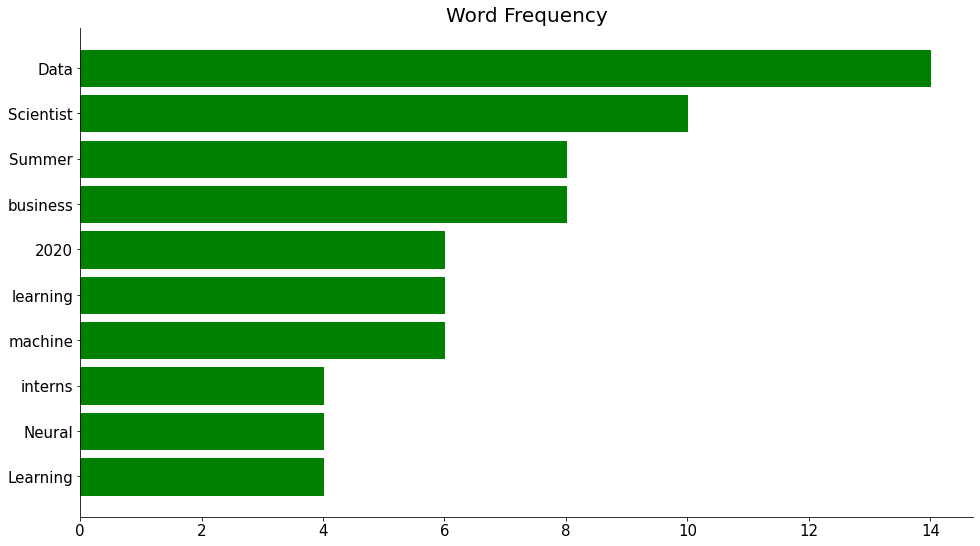

In [225]:
# Counter frequency of words
frequency = Counter(remaining_words)

# Create a dataframe
frequency_df = pd.DataFrame()
frequency_df['Word'] = frequency.keys()
frequency_df['Freq'] = frequency.values()

# Sort dataframe and take the first 10
frequency_df.sort_values(['Freq'], ascending = False, inplace = True)
frequency_df = frequency_df.iloc[0:10]

# Reverse order only for visual
frequency_df.sort_values(['Freq'], ascending = True, inplace = True)

# Creating Figure
figure, axis = plt.subplots(figsize = (16,9))

# Time Histogram
plot_axis = axis
plot_config('Word Frequency', plot_axis,'','')

# Plot Actuals
plt.barh(frequency_df.Word, frequency_df.Freq, color="green", edgecolor='green')

### Generating Wordcloud

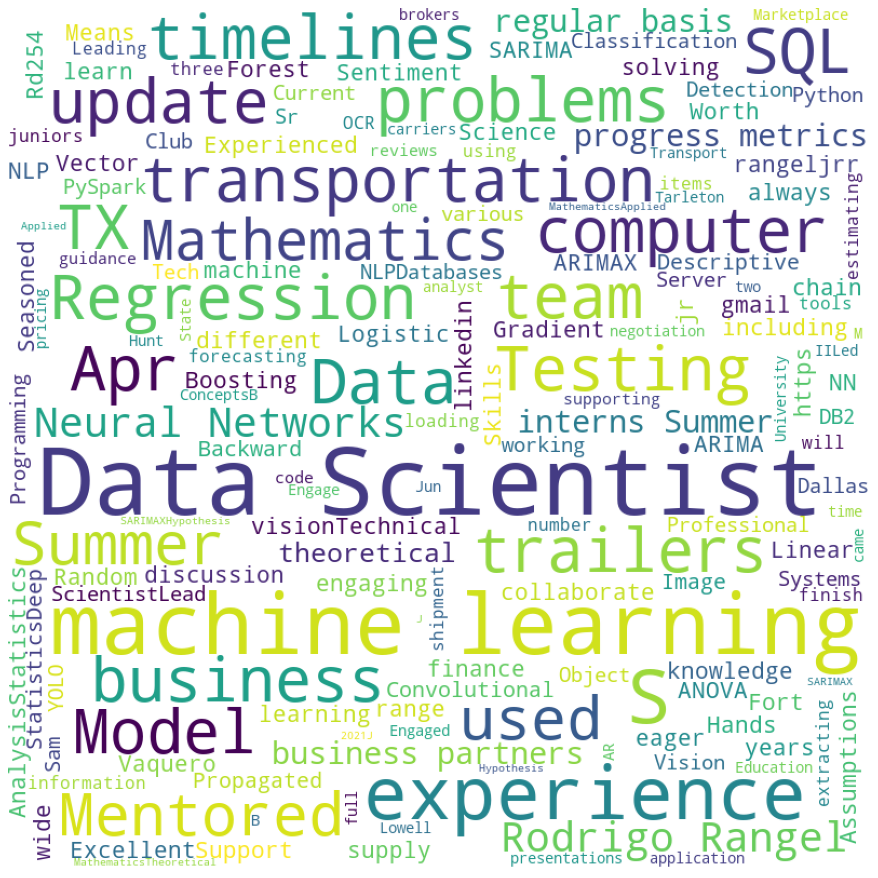

In [239]:
# pip install wordcloud
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(all_text))
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Describe what you would do differently if you are processing a high volume of standardized format document such as W-2s in pdf, and you only need to extract a few fields (such as Gross Income and Fed Tax) from each of the documents.

Given the forms are standardized, and assuming the pdf size is the same across all forms, I would crop the images beforehand and process the cropped images through the models. This will actually imporive the performance when dealing with a high volume of images.

Another option is to use a pretrained model like Tersseract or Azure Form Recognizer to export certain contents of the image